### NAMA : INDRIANI LUTFIYYATUNNISA
### NIM : 1306620035
### MATA KULIAH : PENGOLAHAN CITRA DIGITAL
___
### TRANSFORMASI FFT

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(<matplotlib.image.AxesImage at 0x1d13fd01ca0>,
 Text(0.5, 1.0, 'Original Image'))

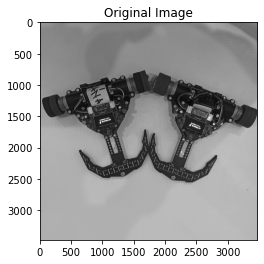

In [2]:
img_c1 = cv2.imread("linefollower.jpg", 0)
plt.imshow(img_c1, "gray"), plt.title("Original Image")

(<matplotlib.image.AxesImage at 0x1d13fe0cca0>, Text(0.5, 1.0, 'Spectrum'))

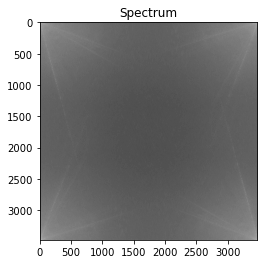

In [3]:
img_c2 = np.fft.fft2(img_c1)
plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")

(<matplotlib.image.AxesImage at 0x1d13fe8c1c0>,
 Text(0.5, 1.0, 'Centered Spectrum'))

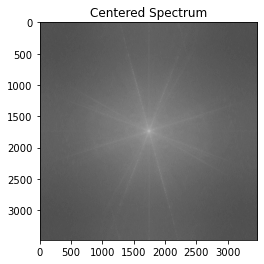

In [4]:
img_c3 = np.fft.fftshift(img_c2)
plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")

(<matplotlib.image.AxesImage at 0x1d13fef41f0>,
 Text(0.5, 1.0, 'Decentralized'))

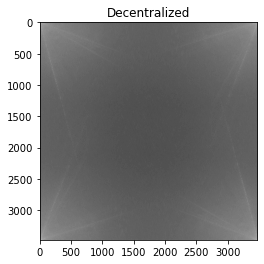

In [5]:
img_c4 = np.fft.ifftshift(img_c3)
plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")

(<matplotlib.image.AxesImage at 0x1d111445df0>,
 Text(0.5, 1.0, 'Processed Image'))

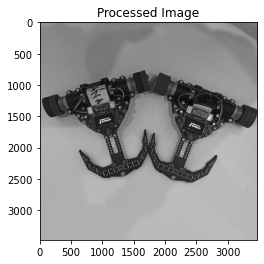

In [6]:
img_c5 = np.fft.ifft2(img_c4)
plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

In [7]:
## Gaussian Filters

def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

In [8]:
img = cv2.imread("linefollower.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

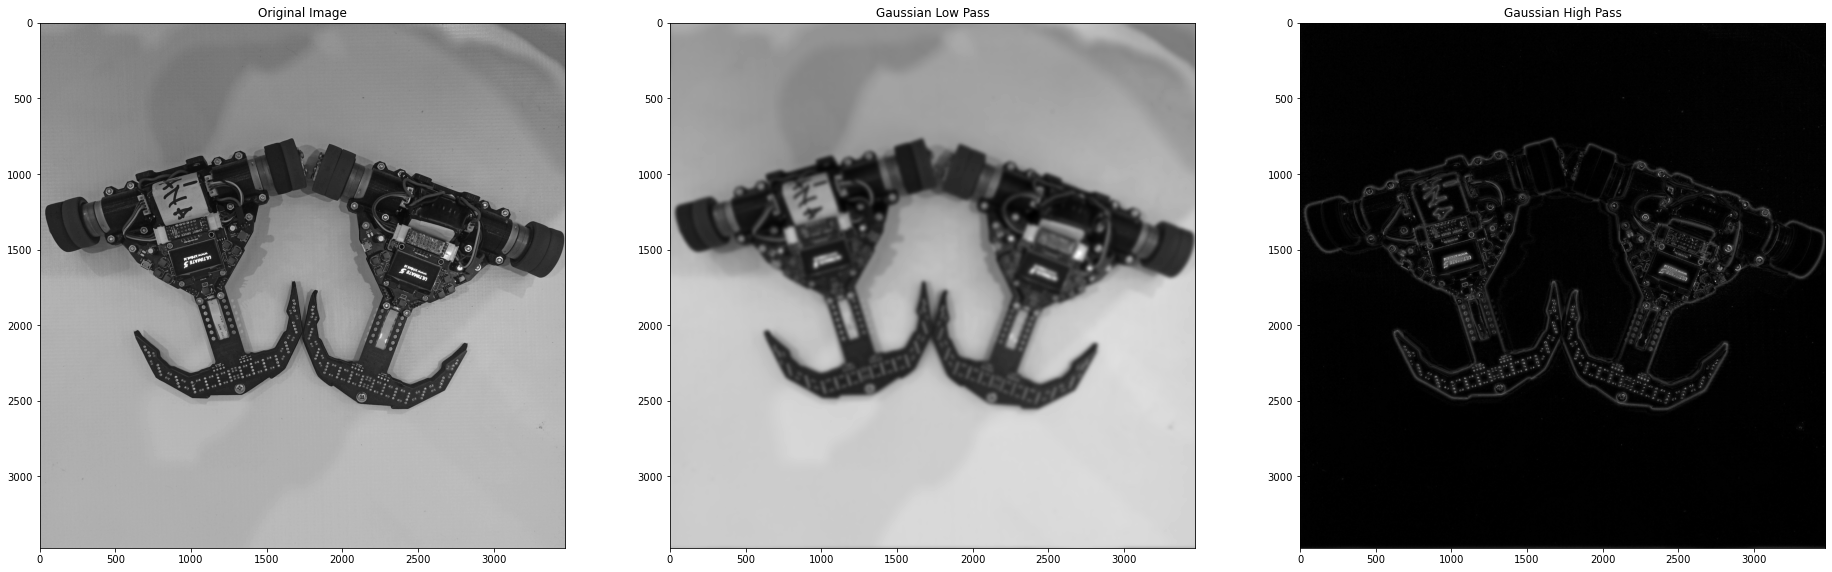

In [9]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()